In [1]:
import numpy as np
import pandas as pd
data = pd.read_excel('3span-beams-ROT.xlsx')
print(data.shape)
data=data.dropna()
print(data.shape)

(64583, 69)
(64582, 69)


In [2]:
data.iloc[1]

P1            178
P2            356
P3             89
LPf       7.45075
L1              1
          ...    
r56    0.00864886
r57    0.00949313
r58     0.0100962
r59      0.010458
r60     0.0105786
Name: 1, Length: 69, dtype: object

In [3]:
shape=data.shape
N=shape[0]

inp=np.zeros((N,31,1))
LPF = np.zeros((N,1))
Y = np.zeros((N,31))
Ls = np.zeros((N,6,1))


for ii in range(0,N):
    
    P1= int(data.iloc[ii,0])
    P2= int(data.iloc[ii,1])
    P3= int(data.iloc[ii,2])
    
    L1= int(data.iloc[ii,4])
    L2= int(data.iloc[ii,5])
    L3= int(data.iloc[ii,6])
    
    Ls[ii,0,0] = (P1*data.iloc[ii][3]+P1*0.001)*0.01
    Ls[ii,1,0] = (P2*data.iloc[ii][3]+P2*0.001)*0.01
    Ls[ii,2,0] = (P3*data.iloc[ii][3]+P3*0.001)*0.01
    
    Ls[ii,3,0] = L1
    Ls[ii,4,0] = L2
    Ls[ii,5,0] = L3
    
    LPF[ii,0]= data.iloc[ii][3]
    
    pos = data.iloc[ii,7]
    if pos=="meio":
        inp[ii,5,0] = 1
        inp[ii,11,0] = 1
        inp[ii,12,0] = 1
        inp[ii,13,0] = 1
        inp[ii,14,0] = 1
        inp[ii,15,0] = 1
        inp[ii,16,0] = 1
        inp[ii,17,0] = 1
        inp[ii,18,0] = 1
        inp[ii,19,0] = 1
        inp[ii,25,0] = 1
    elif pos=="ponta":
        inp[ii,5,0] = 1
        inp[ii,15,0] = 1
        inp[ii,21,0] = 1
        inp[ii,22,0] = 1
        inp[ii,23,0] = 1
        inp[ii,24,0] = 1
        inp[ii,25,0] = 1
        inp[ii,26,0] = 1
        inp[ii,27,0] = 1
        inp[ii,28,0] = 1
        inp[ii,29,0] = 1

    
    
    Y[ii,:] = data.iloc[ii][[8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68]]


    




In [4]:
for i in range(10):
    print(inp[i,:,0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]


In [5]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(31,1))
inputB = krs.Input(shape=(6,))

# the first branch operates on the first input
x = Conv1D(512, kernel_size=1, activation="relu")(inputA)
x = Conv1D(256, kernel_size=1, activation="relu")(x)
x = Conv1D(128, kernel_size=1, activation="relu")(x)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(31, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(6, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(128, activation="relu")(combined)
z = Dense(64, activation="relu")(z)
z = Dense(32, activation="relu")(z)
z = Dense(31, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1))
history1 = model.fit( [inp,Ls[:,:,0]], Y, validation_data=([inp,Ls[:,:,0]], Y), epochs=30, batch_size=32, verbose=1)  

 
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'],label = 'mlp')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Using TensorFlow backend.
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1




Tensor("dense_1/Relu:0", shape=(?, 31), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 6), dtype=float32)



Train on 64582 samples, validate on 64582 samples
Epoch 1/30
64582/64582 [==============================] - 40s 614us/step - loss: 0.0073 - val_loss: 0.0028
Epoch 2/30
64582/64582 [==============================] - 38s 591us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3/30
64582/64582 [==============================] - 38s 590us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 4/30
64582/64582 [==============================] - 38s 593us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 5/30
64582/64582 [==============================] - 38s 592us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 6/30
64582/64582 [==============================] - 38s 589us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/30
64582/64582 [==============================] - 39s 600us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 8/30
64582/64582 [==============================] - 38s 589us/step - loss: 0.

<Figure size 640x480 with 1 Axes>

In [6]:
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

In [7]:
  y_pred1 = model.predict([inp,Ls[:,:,0]])

0.0 0.0 1.0


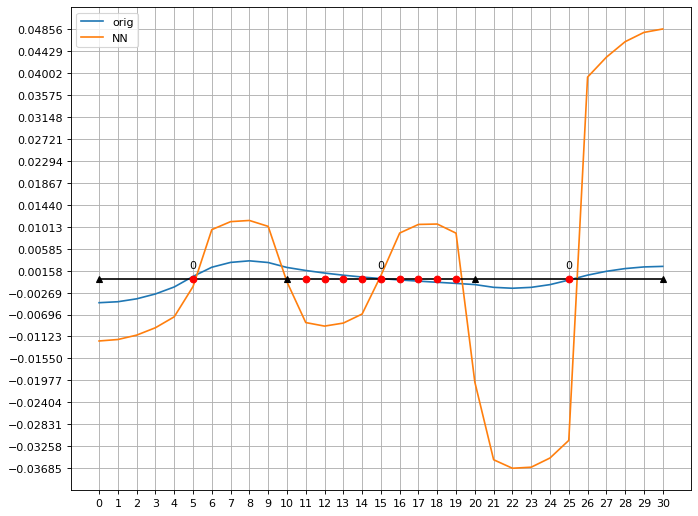

0.0 0.0 1.0


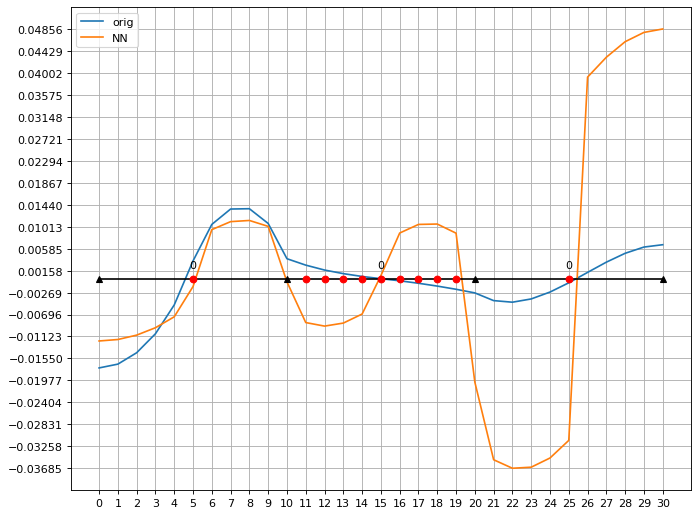

0.0 0.0 1.0


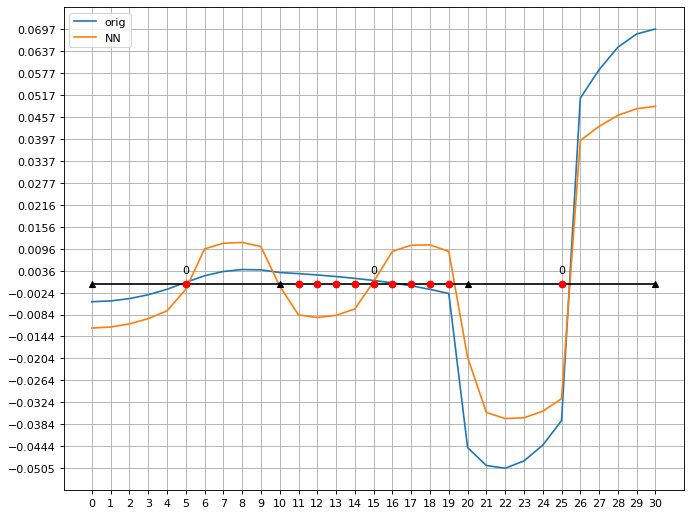

0.0 0.0 1.0


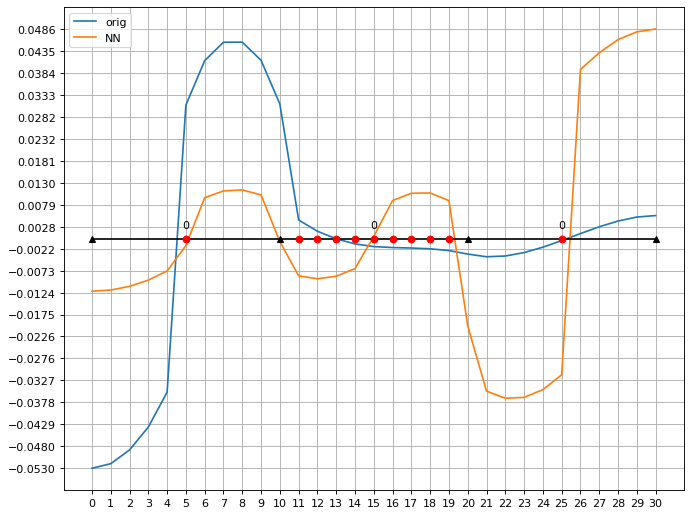

0.0 0.0 1.0


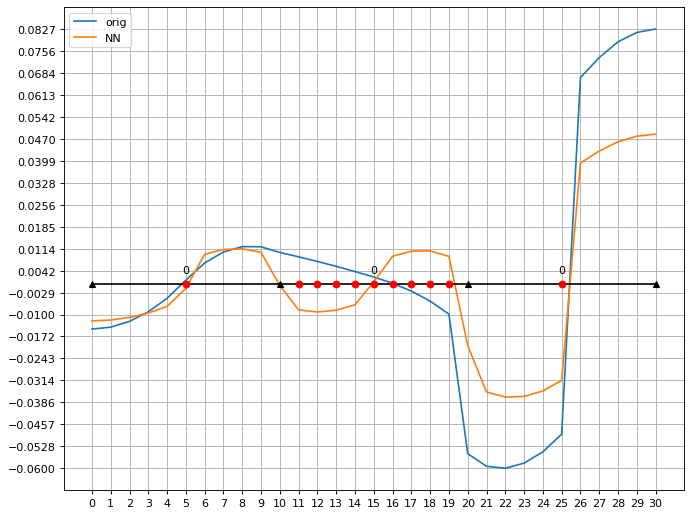

0.0 0.0 1.0


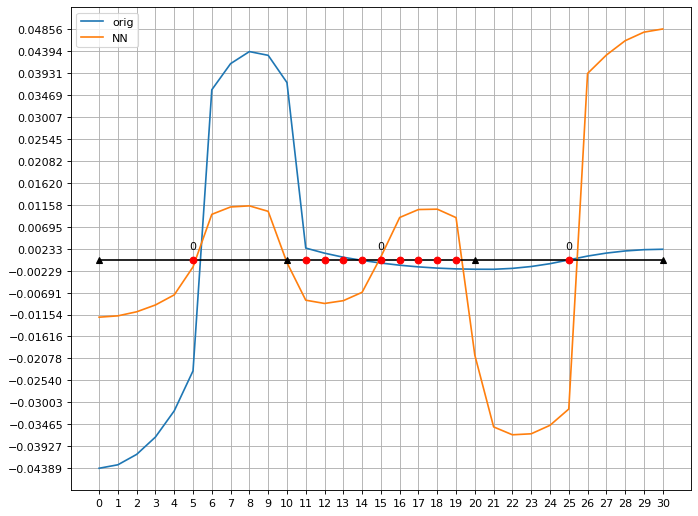

0.0 0.0 1.0


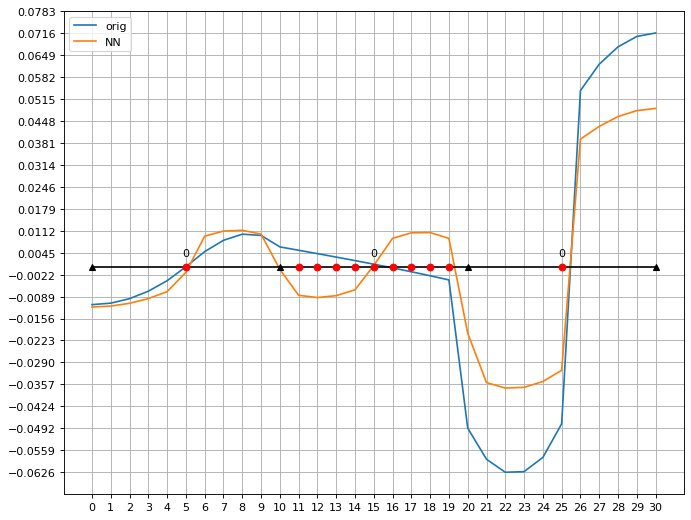

0.0 0.0 1.0


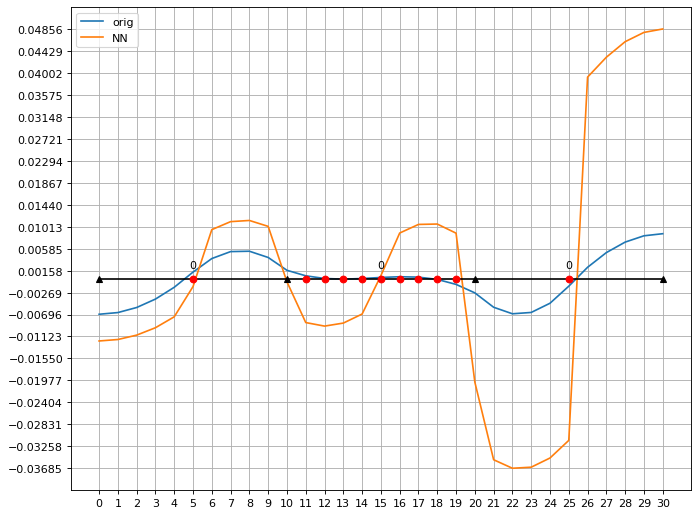

0.0 0.0 1.0


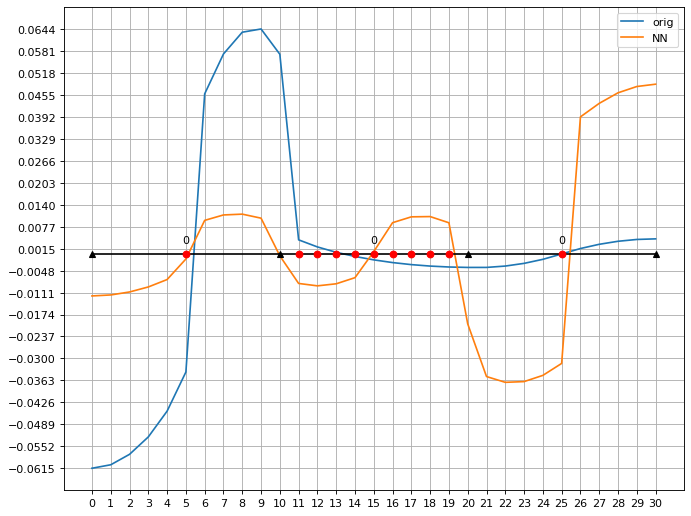

0.0 0.0 1.0


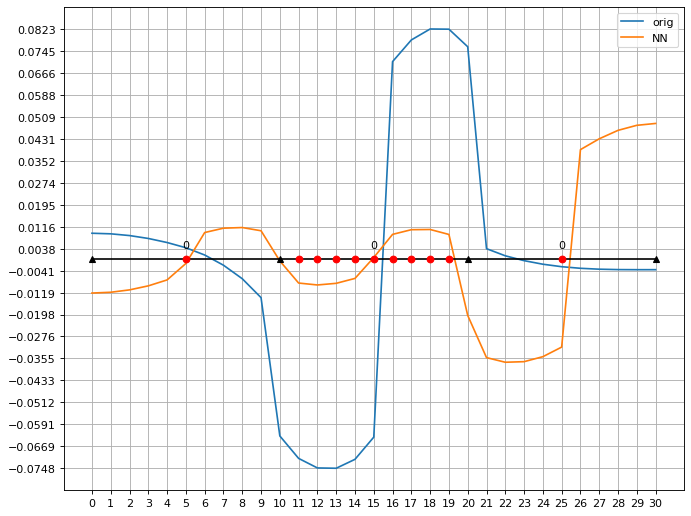

0.0 0.0 1.0


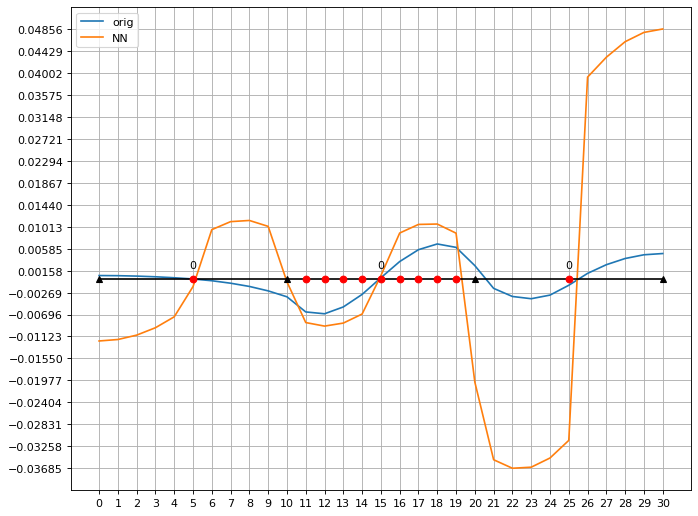

0.0 0.0 1.0


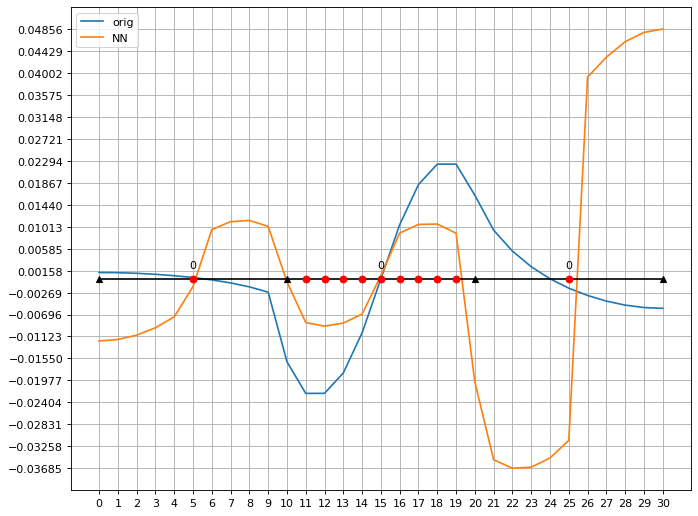

0.0 0.0 1.0


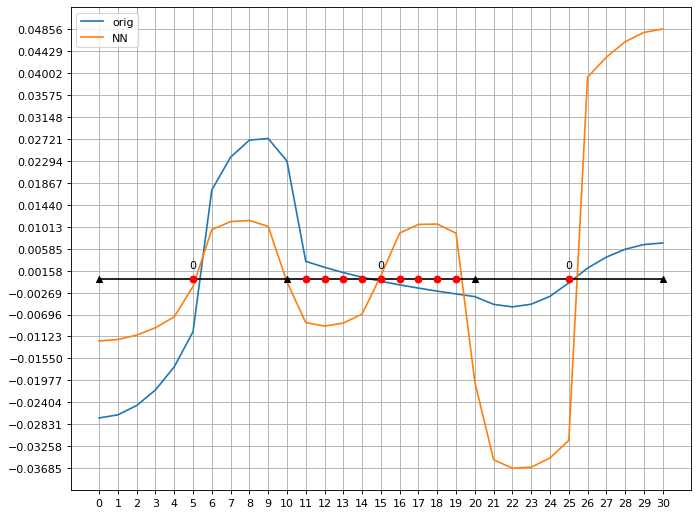

0.0 0.0 1.0


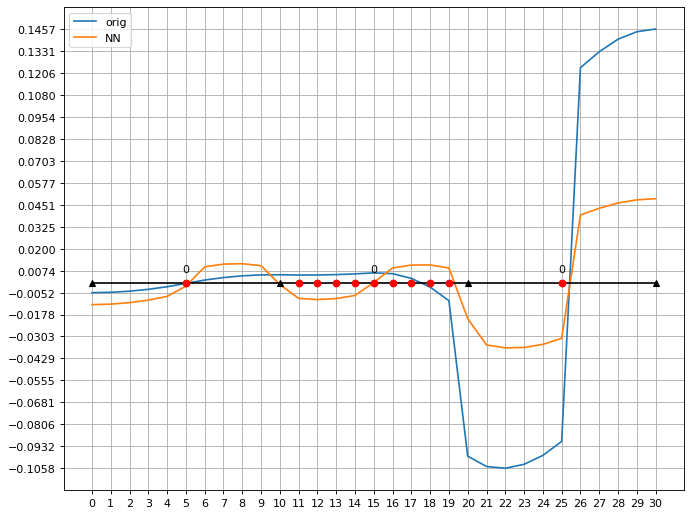

0.0 0.0 1.0


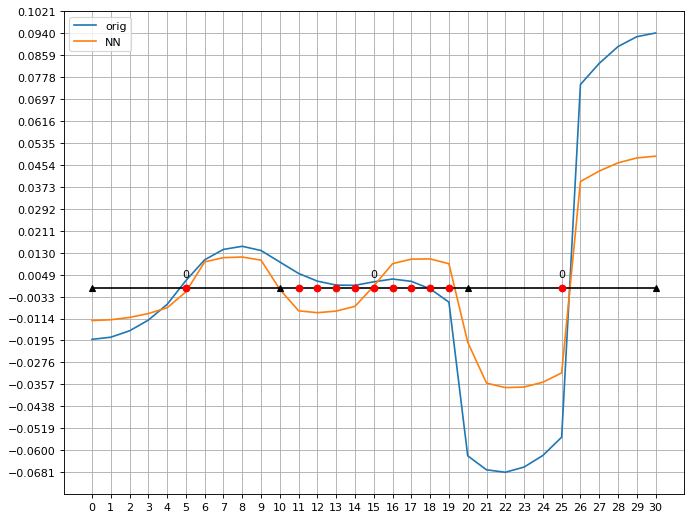

0.0 0.0 1.0


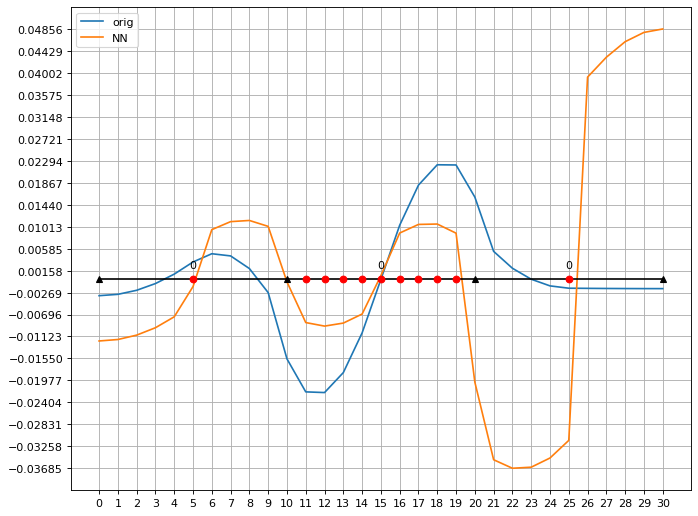

0.0 0.0 1.0


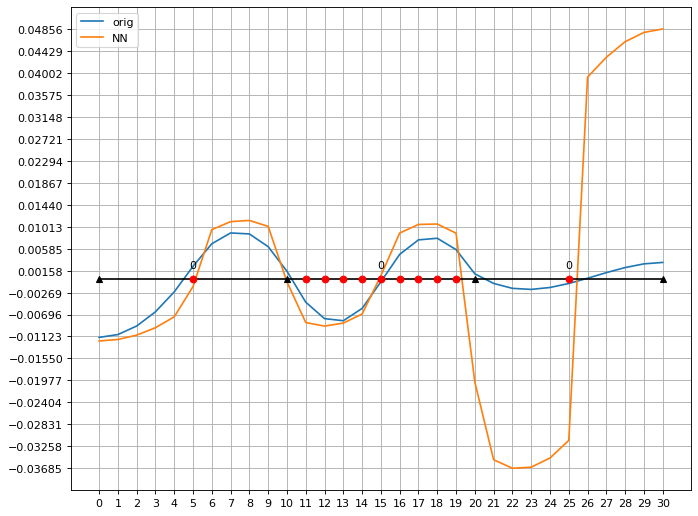

0.0 0.0 1.0


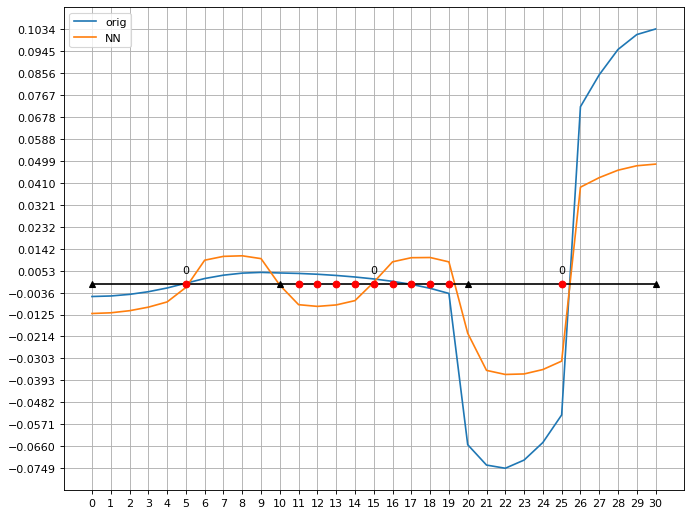

In [10]:
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
for ii in [3244,32423,3453,35676,45644,45655,2233,44444,57677,8455,6566,7456,24345,23222,12222,21346,14567,16757]:
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    
  
    
    print(inp[ii,3,0],inp[ii,4,0],inp[ii,5,0])
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,10,20,30],[0,0,0,0],'^k')
    if inp[ii,6,0]:
        loads=[5,15,21,22,23,24,25,26,27,28,29]
        dots=[25,5,15]
    else:
        loads=[5,11,12,13,14,15,16,17,18,19,25]
        dots=[15,5,25]
    plt.plot(loads,[0,0,0,0,0,0,0,0,0,0,0],'ro')
    
    for i in range(3):
        plt.annotate(int(inp[ii,i,0]*100*LPF[ii,0]), # this is the text
        (dots[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center
    
        
    stepd=(maximo-minimo)/20.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()